Load libraries

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load files

In [377]:
past=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/US-presidential-elections-2020/main/1976-2016-president.csv")
present=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/US-presidential-elections-2020/main/president_county_candidate.csv")
#present taken from:- https://www.kaggle.com/unanimad/us-election-2020?select=president_county_candidate.csv
#past taken from:- https://electionlab.mit.edu/data

In [378]:
past

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,2016,Wyoming,WY,56,83,68,US President,NaN,NaN,True,6904,258788,20171015,NaN
3736,2016,Wyoming,WY,56,83,68,US President,NaN,independent,False,3224,258788,20171015,NaN
3737,2016,Wyoming,WY,56,83,68,US President,Blank Vote,NaN,False,2661,258788,20171015,NaN
3738,2016,Wyoming,WY,56,83,68,US President,"Castle, Darrell L.",constitution party,False,2042,258788,20171015,NaN


In [379]:
present

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
31663,Arizona,Maricopa County,Jo Jorgensen,LIB,31705,False
31664,Arizona,Maricopa County,Write-ins,WRI,0,False
31665,Arizona,Mohave County,Donald Trump,REP,78535,True
31666,Arizona,Mohave County,Joe Biden,DEM,24831,False


Create new column in present

In [380]:
present['year'] = 2020
present

,state,county,candidate,party,total_votes,won,year
0,Delaware,Kent County,Joe Biden,DEM,44552,True,2020
1,Delaware,Kent County,Donald Trump,REP,41009,False,2020
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False,2020
3,Delaware,Kent County,Howie Hawkins,GRN,420,False,2020
4,Delaware,New Castle County,Joe Biden,DEM,195034,True,2020
...,...,...,...,...,...,...,...
31663,Arizona,Maricopa County,Jo Jorgensen,LIB,31705,False,2020
31664,Arizona,Maricopa County,Write-ins,WRI,0,False,2020
31665,Arizona,Mohave County,Donald Trump,REP,78535,True,2020
31666,Arizona,Mohave County,Joe Biden,DEM,24831,False,2020


Rename column in present

In [381]:
present = present.rename({'total_votes': 'candidatevotes'}, axis=1)
present

,state,county,candidate,party,candidatevotes,won,year
0,Delaware,Kent County,Joe Biden,DEM,44552,True,2020
1,Delaware,Kent County,Donald Trump,REP,41009,False,2020
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False,2020
3,Delaware,Kent County,Howie Hawkins,GRN,420,False,2020
4,Delaware,New Castle County,Joe Biden,DEM,195034,True,2020
...,...,...,...,...,...,...,...
31663,Arizona,Maricopa County,Jo Jorgensen,LIB,31705,False,2020
31664,Arizona,Maricopa County,Write-ins,WRI,0,False,2020
31665,Arizona,Mohave County,Donald Trump,REP,78535,True,2020
31666,Arizona,Mohave County,Joe Biden,DEM,24831,False,2020


Pivot table

In [382]:
test = present.groupby(['state','candidate','party', 'year'])['candidatevotes'].sum().reset_index()
test

,state,candidate,party,year,candidatevotes
0,Alabama,Write-ins,WRI,2020,7312
1,Alabama,Donald Trump,REP,2020,1441170
2,Alabama,Jo Jorgensen,LIB,2020,25176
3,Alabama,Joe Biden,DEM,2020,849624
4,Alaska,Write-ins,WRI,2020,76
...,...,...,...,...,...
346,Wyoming,Write-ins,WRI,2020,1739
347,Wyoming,Brock Pierce,IND,2020,2208
348,Wyoming,Donald Trump,REP,2020,193559
349,Wyoming,Jo Jorgensen,LIB,2020,5768


Create train dataframe

In [383]:
train = past[['state', 'candidate', 'party', 'year','candidatevotes']]
train

,state,candidate,party,year,candidatevotes
0,Alabama,"Carter, Jimmy",democrat,1976,659170
1,Alabama,"Ford, Gerald",republican,1976,504070
2,Alabama,"Maddox, Lester",american independent party,1976,9198
3,Alabama,"Bubar, Benjamin """"Ben""""",prohibition,1976,6669
4,Alabama,"Hall, Gus",communist party use,1976,1954
...,...,...,...,...,...
3735,Wyoming,NaN,NaN,2016,6904
3736,Wyoming,NaN,independent,2016,3224
3737,Wyoming,Blank Vote,NaN,2016,2661
3738,Wyoming,"Castle, Darrell L.",constitution party,2016,2042


Check for null values

In [384]:
train.isnull().sum()

state               0
candidate         266
party             336
year                0
candidatevotes      0
dtype: int64

In [385]:
test.isnull().sum()

state             0
candidate         0
party             0
year              0
candidatevotes    0
dtype: int64

Create dictionary

In [386]:
party1 = {'democrat':1, 'DEM':1, 'republican':2, 'REP':2}
train.party = train.party.map(party1)
test.party = test.party.map(party1)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [387]:
train['party'] = train['party'].replace(np.nan, 3)
test['party'] = test['party'].replace(np.nan, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [388]:
train['candidate'] = train['candidate'].replace(np.nan, 'Blank Vote')
test['candidate'] = test['candidate'].replace(np.nan, 'Blank Vote')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [389]:
train

,state,candidate,party,year,candidatevotes
0,Alabama,"Carter, Jimmy",1.0,1976,659170
1,Alabama,"Ford, Gerald",2.0,1976,504070
2,Alabama,"Maddox, Lester",3.0,1976,9198
3,Alabama,"Bubar, Benjamin """"Ben""""",3.0,1976,6669
4,Alabama,"Hall, Gus",3.0,1976,1954
...,...,...,...,...,...
3735,Wyoming,Blank Vote,3.0,2016,6904
3736,Wyoming,Blank Vote,3.0,2016,3224
3737,Wyoming,Blank Vote,3.0,2016,2661
3738,Wyoming,"Castle, Darrell L.",3.0,2016,2042


In [390]:
test

,state,candidate,party,year,candidatevotes
0,Alabama,Write-ins,3.0,2020,7312
1,Alabama,Donald Trump,2.0,2020,1441170
2,Alabama,Jo Jorgensen,3.0,2020,25176
3,Alabama,Joe Biden,1.0,2020,849624
4,Alaska,Write-ins,3.0,2020,76
...,...,...,...,...,...
346,Wyoming,Write-ins,3.0,2020,1739
347,Wyoming,Brock Pierce,3.0,2020,2208
348,Wyoming,Donald Trump,2.0,2020,193559
349,Wyoming,Jo Jorgensen,3.0,2020,5768


In [391]:
train.isnull().sum()

state             0
candidate         0
party             0
year              0
candidatevotes    0
dtype: int64

In [392]:
test.isnull().sum()

state             0
candidate         0
party             0
year              0
candidatevotes    0
dtype: int64

Graphical representation

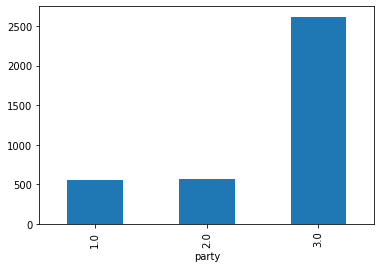

In [394]:
train.groupby('party')['candidatevotes'].count().plot.bar(ylim=0)
plt.show()

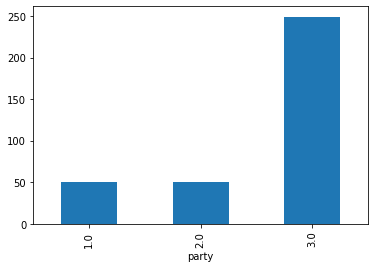

In [395]:
test.groupby('party')['candidatevotes'].count().plot.bar(ylim=0)
plt.show()

Define X, y, and X_test

In [396]:
candidate_votes = test.candidatevotes

y = train.candidatevotes
X = train.drop(['candidatevotes'], axis=1)
X_test = test.drop(['candidatevotes'], axis=1)

In [397]:
y

0       659170
1       504070
2         9198
3         6669
4         1954
         ...  
3735      6904
3736      3224
3737      2661
3738      2042
3739       278
Name: candidatevotes, Length: 3740, dtype: int64

In [398]:
X

,state,candidate,party,year
0,Alabama,"Carter, Jimmy",1.0,1976
1,Alabama,"Ford, Gerald",2.0,1976
2,Alabama,"Maddox, Lester",3.0,1976
3,Alabama,"Bubar, Benjamin """"Ben""""",3.0,1976
4,Alabama,"Hall, Gus",3.0,1976
...,...,...,...,...
3735,Wyoming,Blank Vote,3.0,2016
3736,Wyoming,Blank Vote,3.0,2016
3737,Wyoming,Blank Vote,3.0,2016
3738,Wyoming,"Castle, Darrell L.",3.0,2016


In [399]:
X_test

,state,candidate,party,year
0,Alabama,Write-ins,3.0,2020
1,Alabama,Donald Trump,2.0,2020
2,Alabama,Jo Jorgensen,3.0,2020
3,Alabama,Joe Biden,1.0,2020
4,Alaska,Write-ins,3.0,2020
...,...,...,...,...
346,Wyoming,Write-ins,3.0,2020
347,Wyoming,Brock Pierce,3.0,2020
348,Wyoming,Donald Trump,2.0,2020
349,Wyoming,Jo Jorgensen,3.0,2020


Column transformer

In [400]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      3740 non-null   object 
 1   candidate  3740 non-null   object 
 2   party      3740 non-null   float64
 3   year       3740 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 117.0+ KB


In [401]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

numeric_features = [2, 3]
numeric_transformer = Pipeline(steps=[('imputer', IterativeImputer(random_state=1)),
    ('scaler', StandardScaler())])

categorical_features = [0, 1]
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ])

Split X up for training and validation

In [402]:
#split training set for training and testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.10)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((3366, 4), (374, 4), (3366,), (374,), (351, 4))

Create pipeline

In [403]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', GradientBoostingRegressor(random_state=1, n_estimators=1000, max_depth=5, min_samples_split=2, learning_rate=.1, loss='ls'))])
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9988325345599853


Make predictions

In [404]:
y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
y_pred = [0 if i < 0 else i for i in y_pred]
print(model.score(X_val, y_val))

0.9631516885609804


In [405]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
1241,280,0
1513,483,0
1036,349237,352370
1857,347,7394
705,6378,0
...,...,...
757,1068722,1113259
1672,844,0
3286,63881,18499
2308,77357,44325


Predict on X_test

In [406]:
prediction = model.predict(X_test)
prediction = prediction.astype(int)
prediction = [0 if i < 0 else i for i in prediction]
print(model.score(X_test, candidate_votes))

0.9136205478631483


In [407]:
df=pd.DataFrame({'Actual': candidate_votes, 'Predicted':prediction})
df

,Actual,Predicted
0,7312,15670
1,1441170,838891
2,25176,15670
3,849624,736789
4,76,0
...,...,...
346,1739,0
347,2208,0
348,193559,124012
349,5768,0


In [411]:
test['predicted'] = prediction
test

,state,candidate,party,year,candidatevotes,predicted
0,Alabama,Write-ins,3.0,2020,7312,15670
1,Alabama,Donald Trump,2.0,2020,1441170,838891
2,Alabama,Jo Jorgensen,3.0,2020,25176,15670
3,Alabama,Joe Biden,1.0,2020,849624,736789
4,Alaska,Write-ins,3.0,2020,76,0
...,...,...,...,...,...,...
346,Wyoming,Write-ins,3.0,2020,1739,0
347,Wyoming,Brock Pierce,3.0,2020,2208,0
348,Wyoming,Donald Trump,2.0,2020,193559,124012
349,Wyoming,Jo Jorgensen,3.0,2020,5768,0


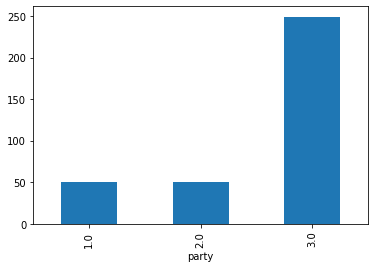

In [415]:
test.groupby('party')['predicted'].count().plot.bar(ylim=0)
plt.show()

Democrat=1, Republican=2, Other=3

In [420]:
predict_winner = test.groupby('party')['predicted'].sum()
predict_winner

party
1.0    58248253
2.0    57218448
3.0     4166674
Name: predicted, dtype: int64

In [421]:
winner = test.groupby('party')['candidatevotes'].sum()
winner

party
1.0    80883844
2.0    74295934
3.0     2879183
Name: candidatevotes, dtype: int64